In [26]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [27]:
print(sys.path)

['C:\\Users\\Admin\\anaconda3\\python311.zip', 'C:\\Users\\Admin\\anaconda3\\DLLs', 'C:\\Users\\Admin\\anaconda3\\Lib', 'C:\\Users\\Admin\\anaconda3', 'c:\\Country_Clustering_Project_CNS\\venv', '', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\Pythonwin', 'c:\\Country_Clustering_Project_CNS', 'c:\\Country_Clustering_Project_CNS']


In [28]:
# import sys, os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))


In [29]:
from src.data_loader import load_data

In [30]:
# # # csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
# # print(os.path.join("..", config.SET_PATH_DATA))
# df = pd.read_csv(csv_path)
# df.head()
df = pd.read_csv(r"C:\Country_Clustering_Project_CNS\data\Country-data.csv")

In [31]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [33]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

In [34]:
df_ve = df.copy(deep = True)
df_ve.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [35]:
df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"Tổng số lượng cột là {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') Tổng số lượng cột là 9


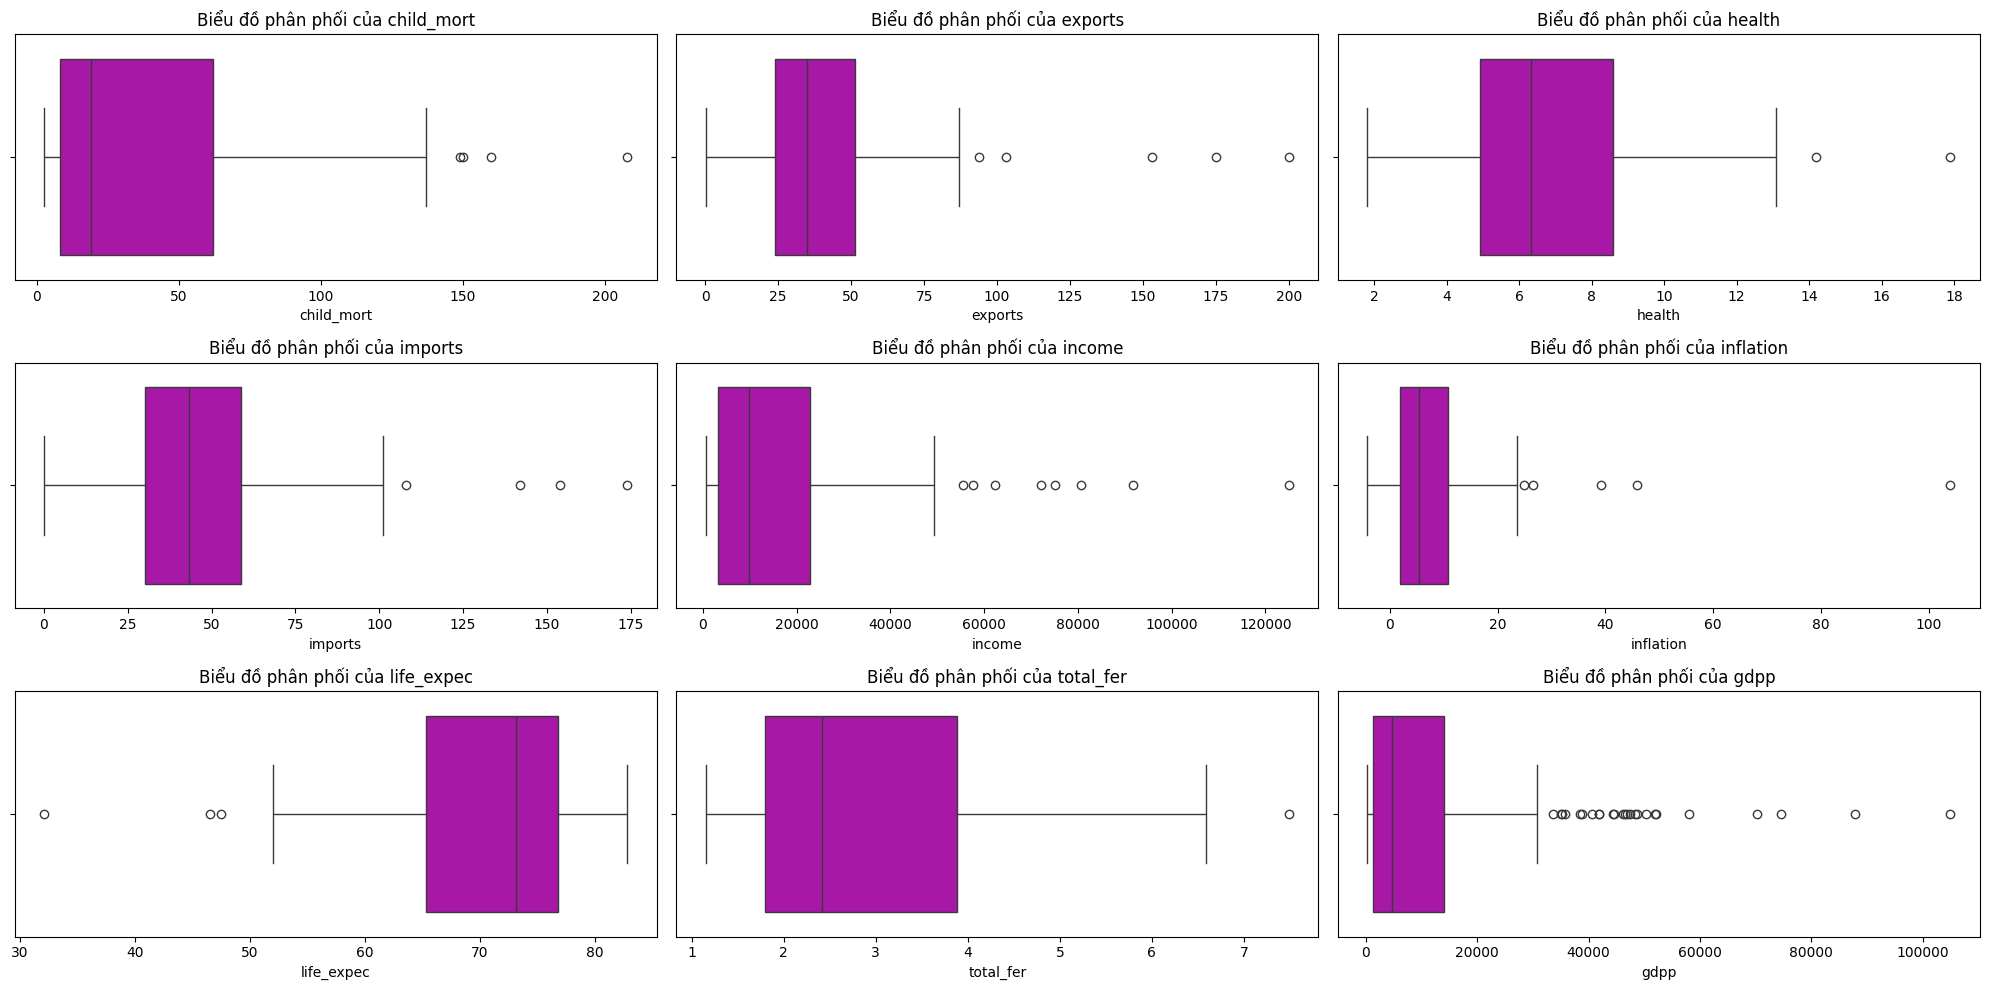

In [36]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()

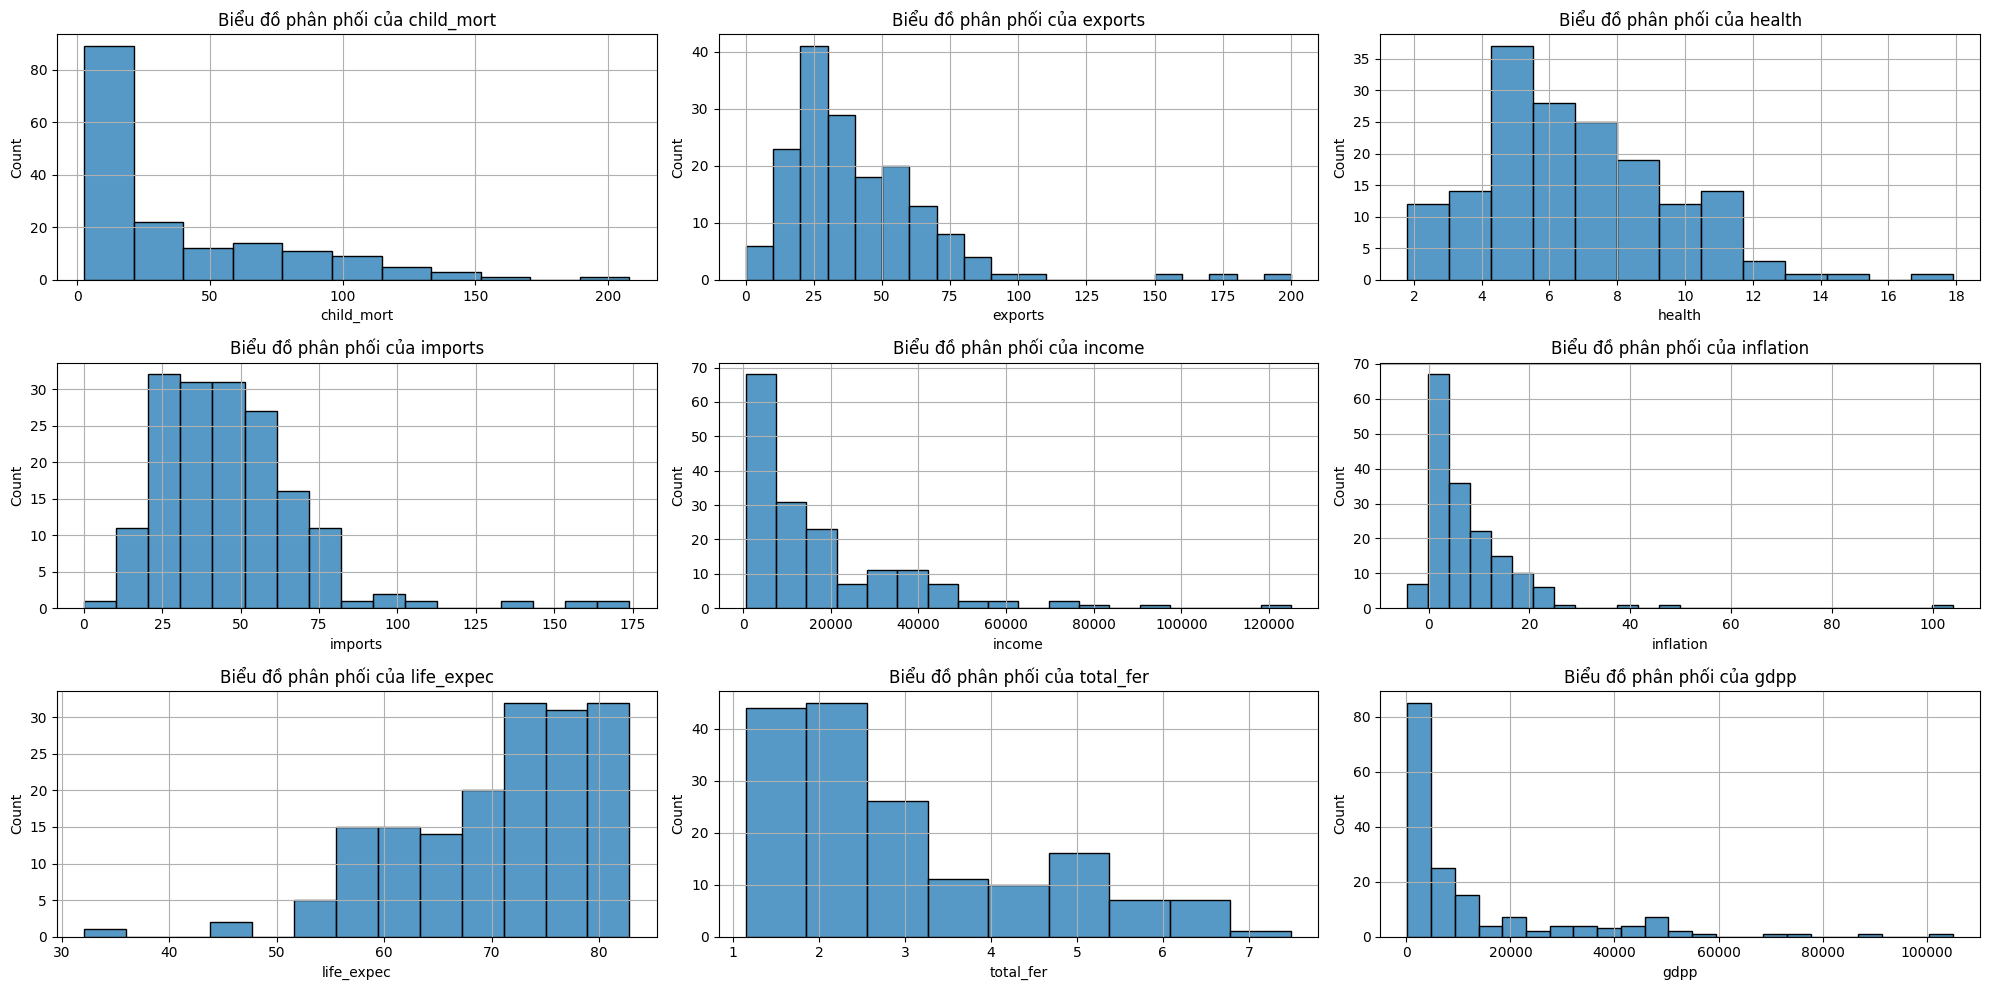

In [37]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()
        

## Phân bố dữ liệu

- **Health**: Phân phối gần với chuẩn, với đỉnh ở khoảng 4–5.
- **Life expectancy**: Phân phối lệch trái – phần lớn quốc gia có tuổi thọ cao, một số ít thấp.
- Các chỉ số còn lại (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) đều **lệch phải**, với đỉnh ở mức thấp và đuôi kéo dài về phía các giá trị cao.

## Tình trạng kinh tế và xã hội

- **Thu nhập bình quân đầu người** rất thấp (đa số dưới 2000 USD).
- **GDP bình quân đầu người** cũng thấp – phản ánh sự giàu có thấp.
- **Của cải và thu nhập** phân bổ không đồng đều, thể hiện rõ qua các giá trị ngoại lệ cao.
- **Mức sống** không đồng đều giữa các quốc gia – thể hiện qua sự chênh lệch lớn trong thu nhập và tuổi thọ trung bình.

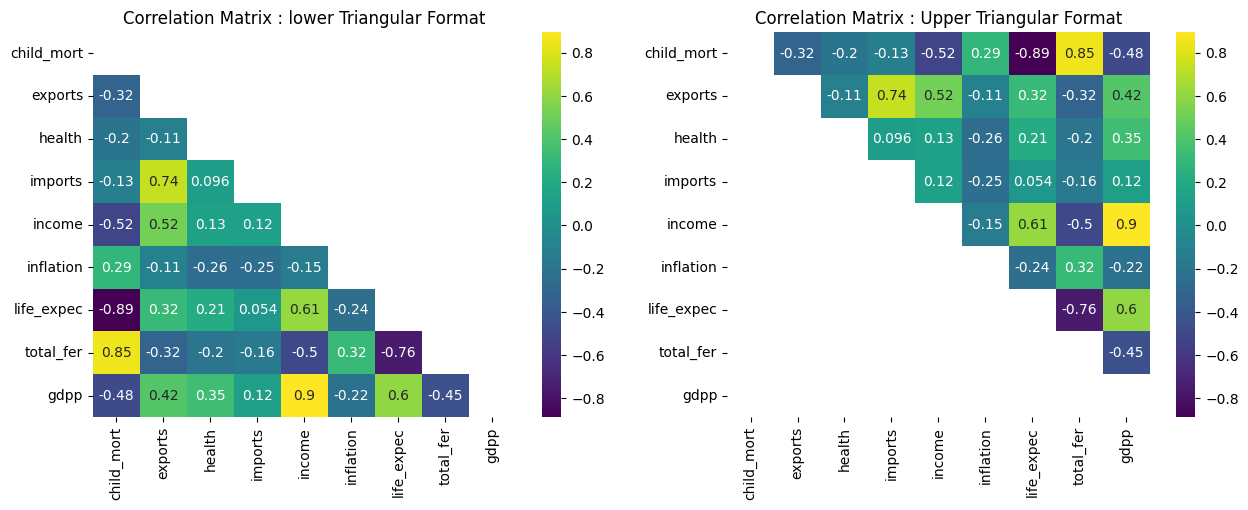

In [38]:
upper_triangle = np.tril(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## 🧠 Phân tích mối quan hệ giữa các đặc trưng và tình trạng quốc gia

### 📉 Ảnh hưởng của điều kiện kinh tế đến sức khỏe và dân số

- **Tỷ lệ trẻ tử vong cao** thường xảy ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **giảm**.
  - `inflation` **tăng**.
- Điều này cho thấy **điều kiện kinh tế ảnh hưởng nghiêm trọng** đến sức khỏe và tuổi thọ của người dân.
- `inflation` tăng → **tỷ lệ tử vong và tỷ lệ sinh đều tăng** ⇒ phản ánh các **quốc gia kém phát triển**.

### 🌍 Vai trò của xuất nhập khẩu

- Khi `exports` **tăng**:
  - `gdpp`, `imports`, `life_expec` **tăng**.
  - `child_mort` và `total_fer` **giảm**.
- Cho thấy **xuất nhập khẩu đóng vai trò quan trọng** trong việc thúc đẩy tăng trưởng kinh tế và cải thiện chất lượng cuộc sống.

---

### 🏁 Kết luận: 3 nhóm đặc trưng chính đánh giá tình trạng quốc gia

| Nhóm đặc trưng | Thuộc tính liên quan                                      | Ý nghĩa tổng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Phản ánh sức khỏe và tuổi thọ dân cư     |
| **Trade**      | `exports`, `imports`                                      | Đo lường mức độ mở cửa và hội nhập quốc tế |
| **Finance**    | `income`, `gdpp`, `inflation`                             | Đánh giá năng lực tài chính và ổn định vĩ mô |

=> Dựa trên ba nhóm này, có thể **suy ra mức độ phát triển và tình trạng sống của một quốc gia** một cách tương đối chính xác.


In [39]:
from src.data_preprocessing import feature_engineering
df1 = feature_engineering(df)
print("Dữ liệu được tạo ra sau khi feature_engineering")
print(df1.head())


Đã tạo ra các đặc trưng mới
Dữ liệu được tạo ra sau khi feature_engineering
      Trade    Health   Finance
0  1.200812  6.239852  1.349645
1  1.717580  3.035901  1.471658
2  1.603752  3.389763  3.165367
3  2.430387  6.469020  3.494919
4  2.362940  2.964898  2.240150


In [40]:
from src.data_preprocessing import use_preprocesing
df1 = use_preprocesing(df , use_pca= False)
print("Hiển thị 5 dòng đầu tiên của dự liệu sau khi feature_engineering")
print(df1)


Đã tạo ra các đặc trưng mới
Hiển thị 5 dòng đầu tiên của dự liệu sau khi feature_engineering
        Trade    Health   Finance
0    0.139614  0.625740  0.079820
1    0.199901  0.127451  0.088756
2    0.186622  0.182485  0.212808
3    0.283058  0.661381  0.236946
4    0.275189  0.116409  0.145043
..        ...       ...       ...
162  0.262886  0.217274  0.035009
163  0.124193  0.133337  0.559740
164  0.403386  0.170070  0.121436
165  0.170248  0.397451  0.229632
166  0.181405  0.526909  0.134997

[167 rows x 3 columns]


## Apply Kmeans

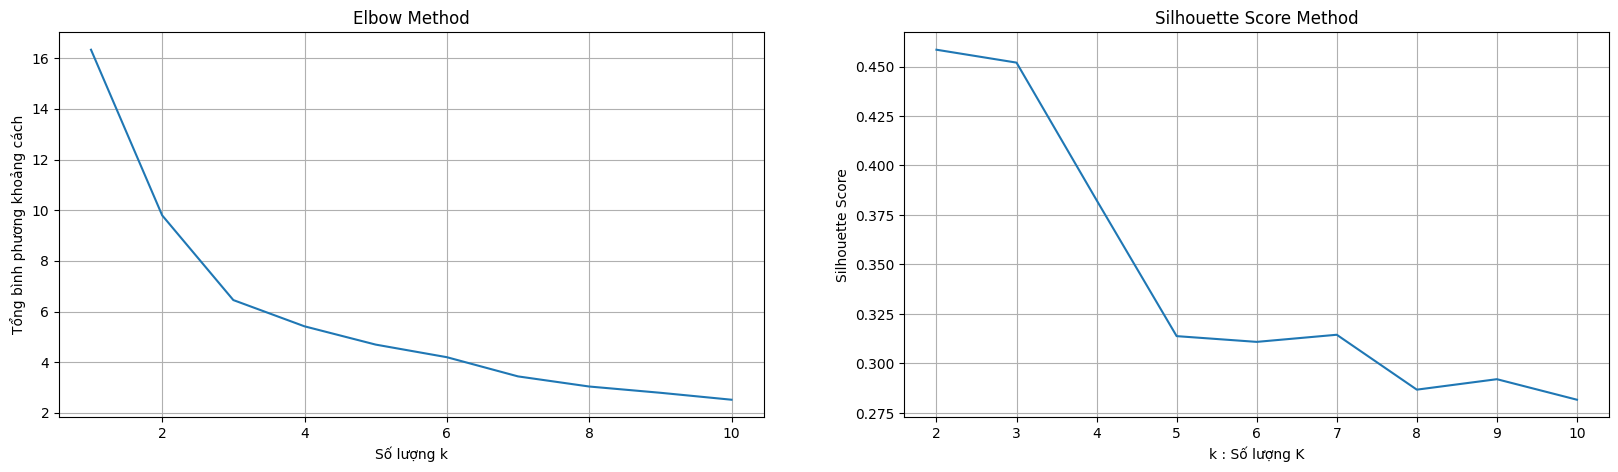

In [41]:
from src.visualization import select_k_for_kmeans
select_k_for_kmeans(df1)


- Bằng phương pháp khủy tay và độ phân biệt thì k = 3 có thể phân biệt rõ các cụm nên chọn k = 3

In [42]:
from src.clustering import get_compose
pipe = get_compose(
    df1,
    use_pca = False , 
    use_kmean= True , 
    n_clusters= 3
)
pipe

,steps,"[('preprocess', ...), ('kmean', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mms', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


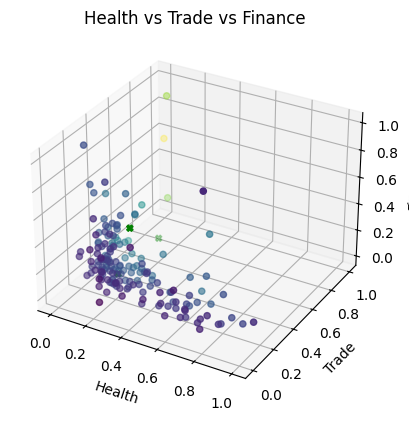

In [43]:
pipe.fit(df1)
labels = pipe.named_steps["kmean"].labels_
cluster = pipe.named_steps["kmean"].cluster_centers_
centroids = np.array(cluster)
df['Class'] = labels 
df1['Class'] = labels 

fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="g")
ax.scatter3D(x , y , z , c = y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()



- Không xác định được
- Vẽ tỷ lệ tử vong và thu nhập để phân cụm

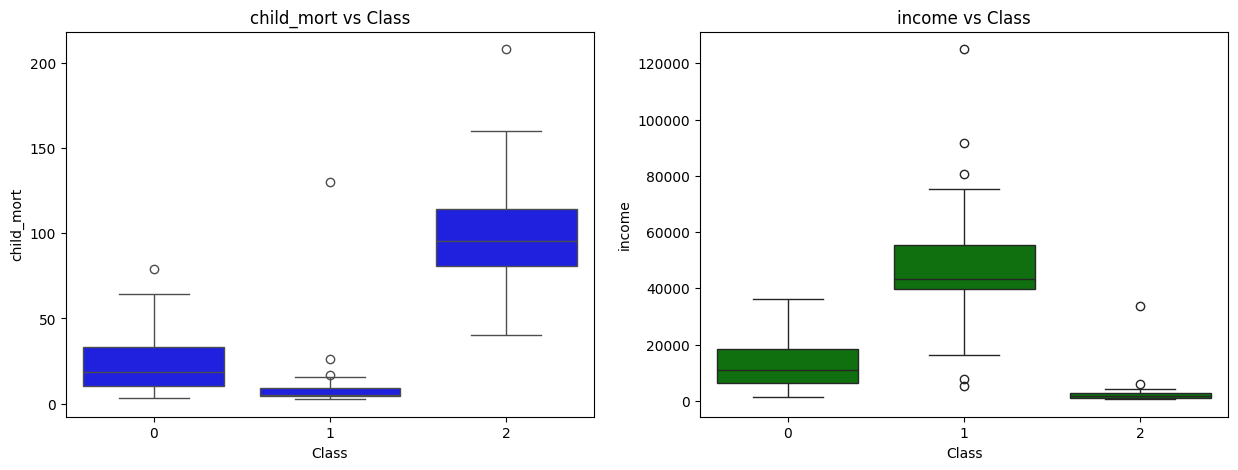

In [44]:
from src.visualization import plot_boxplot_by_class 
plot_boxplot_by_class(df)

## Từ biểu đồ trên
- 0 :Có thể cần hộ trợ nếu đủ ngân sách
- 2 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
- 1 :Không cần phải hỗ trợ

In [45]:
df_result = df1.copy(deep= True)

In [46]:
df1['Class'].loc[df1['Class'] == 0] = 'Có thể cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==1] = 'Không cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==2] = 'Rất cần hỗ trợ' 

In [47]:
df1['Class'].value_counts()

Class
Có thể cần hỗ trợ    102
Rất cần hỗ trợ        36
Không cần hỗ trợ      29
Name: count, dtype: int64

In [48]:
from sklearn.metrics import silhouette_score

In [50]:
res = []
score = silhouette_score(df_result , labels ,metric="euclidean")
final = df1["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)
res

[{'Có thể cần hỗ trợ': 102,
  'Rất cần hỗ trợ': 36,
  'Không cần hỗ trợ': 29,
  'silhouette_score': 0.7958469107193757}]